### **Dependency install**

In [1]:
# NJOY
! apt-get install gfortran build-essential dvipng texlive-latex-extra texlive-fonts-recommended texlive-latex-recommended cm-super -qq > /dev/null
! git clone https://github.com/njoy/NJOY2016.git
%cd /content/NJOY2016
! mkdir bld
%cd /content/NJOY2016/bld
! cmake -Dstatic=on ../
! make -j 2 install

# ASAPy
%cd /content/
! git clone https://github.com/veeshy/ASAPy.git
%cd ASAPy/
! pip install .
%cd boxer2mat/
! make

! pip install SciencePlots

import matplotlib.pyplot as plt
import scienceplots
import numpy as np
import pandas as pd

%cd /content/

Streaming output truncated to the last 5000 lines.
      |                                1
/content/NJOY2016/src/samm.f90:2412:38:

 2412 |                                   if (bx.ne.zero) then
      |                                      1
/content/NJOY2016/src/samm.f90:2413:41:

 2413 |                                      if (dx.ne.zero) then
      |                                         1
/content/NJOY2016/src/samm.f90:2415:44:

 2415 |                                         if (cx.ne.zero) then
      |                                            1
/content/NJOY2016/src/samm.f90:2165:19:

 2165 |                if (b.ne.zero) then
      |                   1
/content/NJOY2016/src/samm.f90:2175:25:

 2175 |                      if (bx.ne.zero) then
      |                         1
/content/NJOY2016/src/samm.f90:2209:19:

 2209 |                if (acn.ne.zero) then
      |                   1
/content/NJOY2016/src/samm.f90:2245:23:

 2245 |                    if (b.ne.zero) the

## **$^{235}\mathrm{U}$**

In [2]:
! mkdir endf7 jendl

In [3]:
# endf-7
%cd /content/endf7/
! wget --user-agent='Mozilla' https://www-nds.iaea.org/public/download-endf/ENDF-B-VII.1/n/n_9228_92-U-235.zip
! unzip n_9228_92-U-235.zip
! python /content/ASAPy/ASAPy/EndfToCov.py n_9228_92-U-235.dat -energy_bin_structure SCALE_44 -temperature 296 -boxer_exec /content/ASAPy/boxer2mat/boxer2mat

# jendl
%cd /content/jendl/
! wget --user-agent='Mozilla' https://www-nds.iaea.org/public/download-endf/JENDL-4.0u2-20160106/n/n_9228_92-U-235.zip
! unzip n_9228_92-U-235.zip
! python /content/ASAPy/ASAPy/EndfToCov.py n_9228_92-U-235.dat -energy_bin_structure SCALE_44 -temperature 296 -boxer_exec /content/ASAPy/boxer2mat/boxer2mat

/content/endf7
--2023-02-20 07:52:43--  https://www-nds.iaea.org/public/download-endf/ENDF-B-VII.1/n/n_9228_92-U-235.zip
Resolving www-nds.iaea.org (www-nds.iaea.org)... 172.67.0.125, 104.20.23.134, 104.20.22.134, ...
Connecting to www-nds.iaea.org (www-nds.iaea.org)|172.67.0.125|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16788120 (16M) [application/zip]
Saving to: ‘n_9228_92-U-235.zip’

n_9228_92-U-235.zip 100%[===================>]  16.01M  14.8MB/s    in 1.1s    

2023-02-20 07:52:45 (14.8 MB/s) - ‘n_9228_92-U-235.zip’ saved [16788120/16788120]

Archive:  n_9228_92-U-235.zip
  inflating: n_9228_92-U-235.dat     
{25: 'covr_296.txt', 32: 'covr_nu_296.txt', 36: 'covr_chi_296.txt'}

 njoy 2016.69  07Feb22                                       02/20/23 07:52:49
 *****************************************************************************

 reconr...                                                                0.0s

 ---message from lunion---xsec nonzero

### **$(n,γ)$**

/content


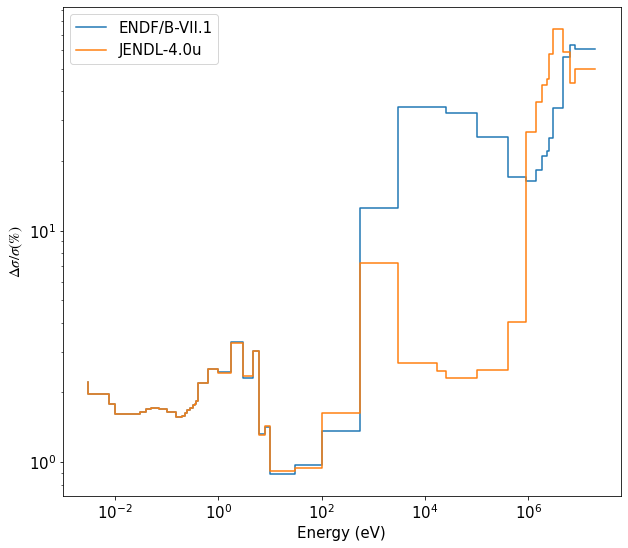

In [10]:
%cd /content/

%matplotlib inline

plt.rcParams.update({
    "font.serif" : "Times New Roman",
    "font.family" : "serif",
    "font.size" : 15,
    "mathtext.fontset" : "stix"
    })

# endf7
u35_e7 = pd.HDFStore('/content/endf7/U235_44g.h5', 'r')
u35_std_endf7 = u35_e7['92235/102/92235/102/std_dev']
# jendl
u35_j = pd.HDFStore('/content/jendl/U235_44g.h5', 'r')
u35_std_jendl = u35_j['92235/102/92235/102/std_dev']

fig, ax = plt.subplots(figsize=(10,9))

ax.step(u35_std_endf7['e high'], u35_std_endf7['rel.s.d.(1)']*1e2, where='post', label='ENDF/B-VII.1')
ax.step(u35_std_jendl['e high'], u35_std_jendl['rel.s.d.(1)']*1e2, where='post', label='JENDL-4.0u')

ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel('Energy (eV)')
ax.set_ylabel(r'$\Delta{\sigma}/\sigma (\%)$')
ax.legend()

### **$(n,n)$**

/content


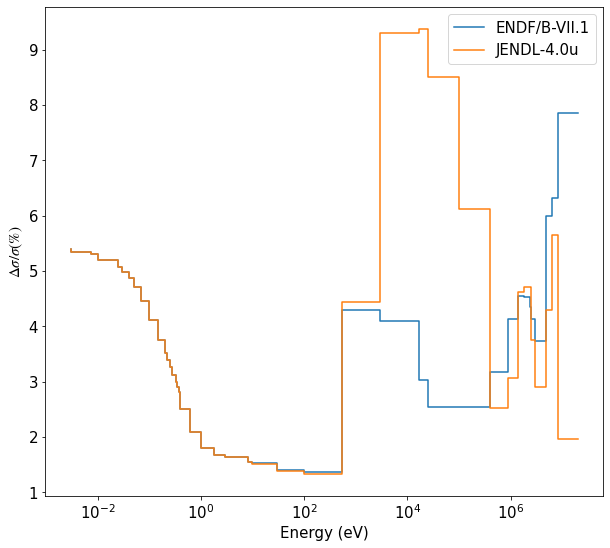

In [8]:
%cd /content/

%matplotlib inline

plt.rcParams.update({
    "font.serif" : "Times New Roman",
    "font.family" : "serif",
    "font.size" : 15,
    "mathtext.fontset" : "stix"
    })

# endf7
u35_e7 = pd.HDFStore('/content/endf7/U235_44g.h5', 'r')
u35_std_endf7 = u35_e7['92235/2/92235/2/std_dev']
# jendl
u35_j = pd.HDFStore('/content/jendl/U235_44g.h5', 'r')
u35_std_jendl = u35_j['92235/2/92235/2/std_dev']

fig, ax = plt.subplots(figsize=(10,9))

ax.step(u35_std_endf7['e high'], u35_std_endf7['rel.s.d.(1)']*1e2, where='post', label='ENDF/B-VII.1')
ax.step(u35_std_jendl['e high'], u35_std_jendl['rel.s.d.(1)']*1e2, where='post', label='JENDL-4.0u')

ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel('Energy (eV)')
ax.set_ylabel(r'$\Delta{\sigma}/\sigma (\%)$')
ax.legend()

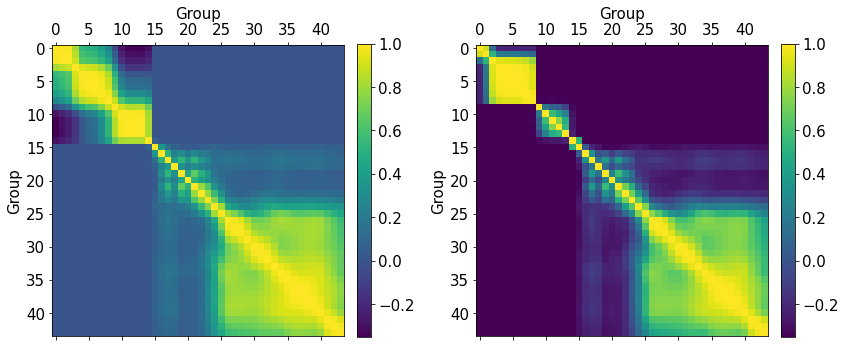

In [17]:
u35_c7 = u35_e7['92235/102/92235/102/corr']
u35_cj = u35_j['92235/102/92235/102/corr']

fig, ax = plt.subplots(ncols=2, figsize=(12, 6))

cax = ax[0].matshow(u35_c7)
fig.colorbar(cax, ax=ax[0], fraction=0.046, pad=0.04)
ax[0].set_xlabel('Group')
ax[0].xaxis.set_label_position('top')
ax[0].set_ylabel('Group')

ax[1].matshow(u35_cj)
fig.colorbar(cax, ax=ax[1], fraction=0.046, pad=0.04)
ax[1].set_xlabel('Group')
ax[1].xaxis.set_label_position('top')
ax[1].set_ylabel('Group')

fig.tight_layout()